## Prediction using Decision Tree Algorithm

## Author: Ashma Subedi

## Introduction 

A **Decision Tree** is a type of supervised learning algorithm which uses a tree like structure and is mostly used in classification problems and regression purposes. It is one of the most popular machine learning algorithms.

A decision tree is a structure that includes a **root node**, **branches**, and **leaf nodes**.

**Imports**

In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
df = pd.read_csv("Irisi.csv",index_col=0)

In [3]:
## view dimensions of dataset
df.shape

(150, 5)

We can see that there are 150 instances and 5 variables in the data set.

In [4]:
# loadin top 5 rows values from dataset
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# renaming the columns name 
df.rename(columns={'SepalLengthCm':'sepal length (cm)','SepalWidthCm':'sepal width (cm)','PetalLengthCm':'petal length (cm)','PetalWidthCm':'petal width (cm)'}, inplace= True)

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.head() #checking wheather the column names are renamed or not

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

There are no missing values in the dataset. 

For data visualization Seaborn library is used. This provides a high-level interface for drawing attractive and informative statistical graphics.

In [9]:
sns.set_style('whitegrid')

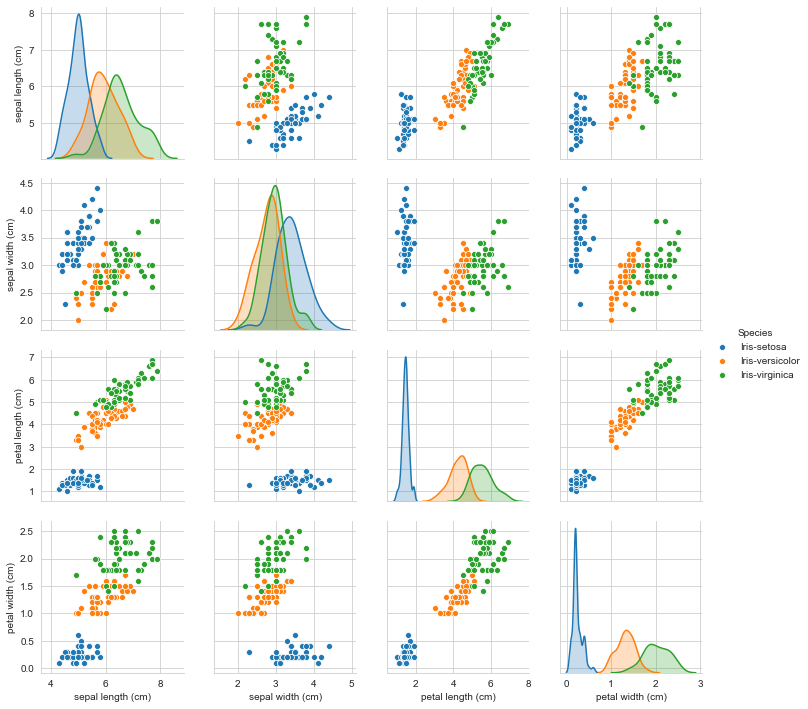

In [10]:
# Data Visualisation Step
sns.pairplot(df,hue ='Species')
# hue - color based on a column name  - in most case it will be Target Columns

## Split data into separate training and test set

In [11]:
X= df.drop('Species',axis=1)
y= df['Species'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.5, random_state=42)
#setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is ran

In [12]:
X_train.shape, X_test.shape

((75, 4), (75, 4))

## Decision Tree algorithm

A **Decision Tree algorithm** has a tree-like structure with each internal node representing an attribute test, each branch representing the test result, and each leaf node representing a class mark. Classification rules are represented by the paths from the root node to the leaf node.

**Root Node**: It is a representative sample of the whole population. This further gets divided into two or more homogeneous sets.

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Decision Node**: A decision node is formed when a sub-node splits into more sub-nodes.

**Leaf/Terminal Node**: Nodes that do not split are called Leaf or Terminal nodes.

**Pruning**: It is the method of removing sub-nodes from a decision node. It is the opposite process of splitting.

**Branch/Sub-Tree**: A sub-section of an entire tree is called a branch or sub-tree.

**Parent and Child Node**: A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

The above terminology is represented clearly in the following diagram:
![title](decisiontree.jpg)

**Let us visualize the Decision Tree to understand it better.**

In [13]:
# Training using Decision Tree Classifier 
dtree=DecisionTreeClassifier() 

In [14]:
#fitting the model in the decision tree classifier 
dtree.fit(X_train, y_train) 

DecisionTreeClassifier()

## Prediction and Evaluation

In [15]:
# predict 
pred = dtree.predict(X_test)  

In [16]:

confusion_matrix(y_test, pred)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]], dtype=int64)

**Confusion matrix** is a table that is often used to describe the performance of a classification model or classifier on a set of test data for which the true values are known.

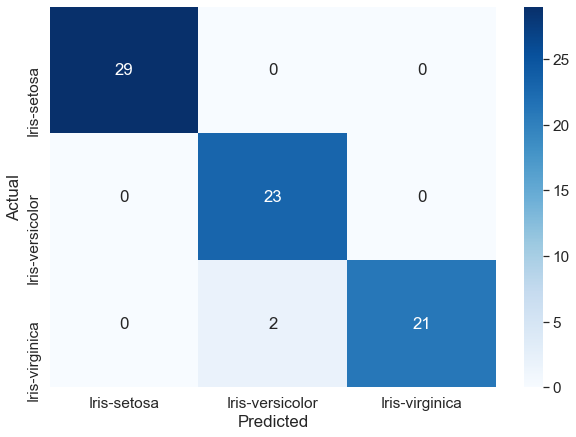

In [17]:
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name= 'Predicted'
plt.figure(figsize=(10,7))
sns.set(font_scale =1.4)
sns.heatmap(df_cm, cmap = "Blues", annot=True) 

The figure above means only two observations has been classifed as false.

In [18]:
print(classification_report(y_test, pred)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.92      1.00      0.96        23
 Iris-virginica       1.00      0.91      0.95        23

       accuracy                           0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.98      0.97      0.97        75



**True Positives (TP)** are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. 

**True Negatives (TN)** are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. 

**False Positives (FP)** and **False Negatives (FN)**, these values occur when your actual class contradicts with the predicted class. 
* FP: When actual class is no and predicted class is yes.
* FN: When actual class is yes but predicted class is no.

**Precision** or positive predictive value is the fraction of relevant instances among the retrieved instances.

**Recall** also known as sensitivity is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.

**F1 score** is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
![title](recall.png)

In [19]:
# important features 
print(dtree.feature_importances_)

[0.01174181 0.04830918 0.40398551 0.5359635 ]


In [20]:
a=pd.DataFrame({'Actual':y_test,'Predicted':pred})
a.head()

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


Let us visualize the Decision Tree to understand it better.

In [21]:
# Import necessary libraries for graph viz
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [22]:
features=list(df.columns)

In [23]:
dot_data = StringIO()

In [24]:
export_graphviz(decision_tree=dtree, out_file=dot_data, feature_names=['SepalLenCm','SepalWidCm','PetalLenCm', 'PetalWidCm'],  
                filled=True, rounded=True,
                special_characters=True)

In [25]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

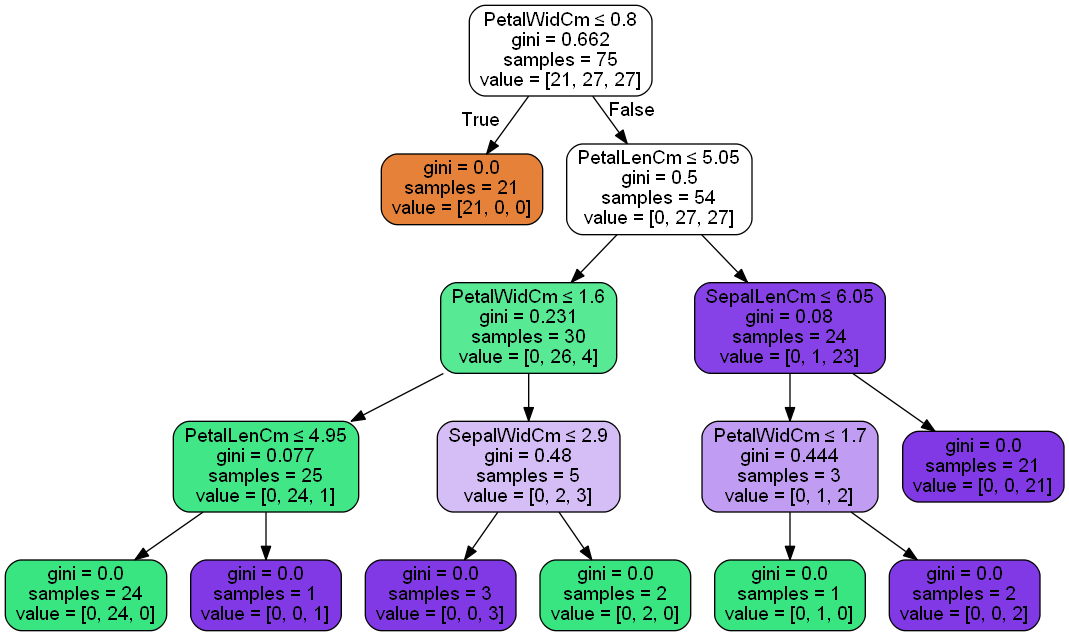

In [26]:
import pydot
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Any data can be add to this classifer and it woulb be able to predict the right class.
